# Exploring different Automatic shading options in Magics

This notebook will help you discover lots of posibilities for using automated shading on your maps in Magics.

### Install Magics
If you don't have Magics installed, run the next cell to install Magics using conda.

In [ ]:
# Install Magics in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} Magics

**mcont** controls shading and lines on our maps. Here you can set things like colours, thickness, style, frequency of your lines and shading.  
List of all **mcont** parameters you can find [in Magics documentation](https://confluence.ecmwf.int/display/MAGP/Contouring "Contouring parameters")


### Import Magics and define non Contour paramters

For start let's import Magics and define some **none contour** parameters. We will try not to change these much in the rest of the notebook.

In [1]:
import Magics.macro as magics
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"  # this command enables us to plot more images at once

projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name    = "europe",
    page_id_line             = "off"
)

coast = magics.mcoast()

legend = magics.mlegend(legend_display_type   = 'continuous')

# Different meteorological parameters we will plot in this notebook
temperature   = magics.mgrib(grib_input_file_name = "../../data/t850.grib")
geopotential  = magics.mgrib(grib_input_file_name = "../../data/z500.grib")
precipitation = magics.mgrib(grib_input_file_name = "../../data/total_precipitation.grib")
sat_ir        = magics.mgrib(grib_input_file_name = "../../data/ssd.grib")

### Automatic ECCHARTS style

Lot's of times when we want to take a look at the data, we want our plot to look like something familiar, for example, plots from **ecCharts**.  

Using just parameter **contour_automatic_setting**, and setting it to **"ecmwf"** we will get same style as the ecCharts default. Even some parameters that are not in ecCharts have built in "ecmwf" styles.  

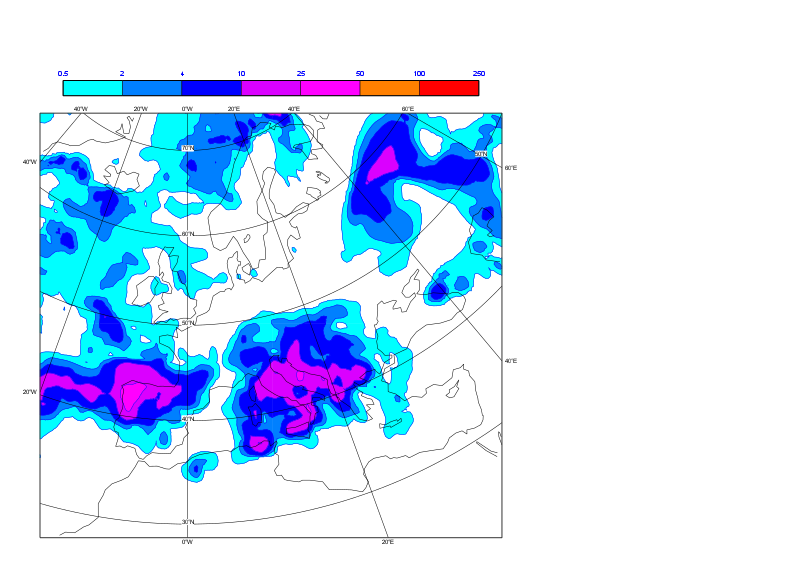

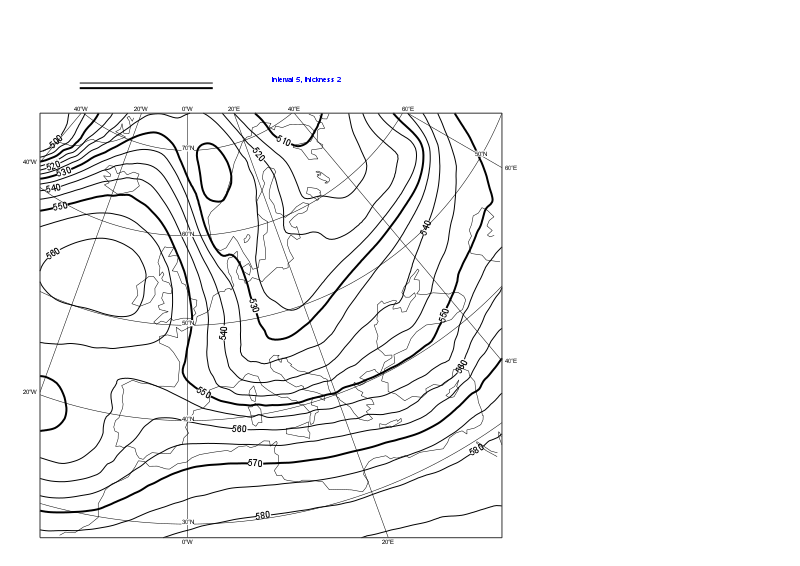

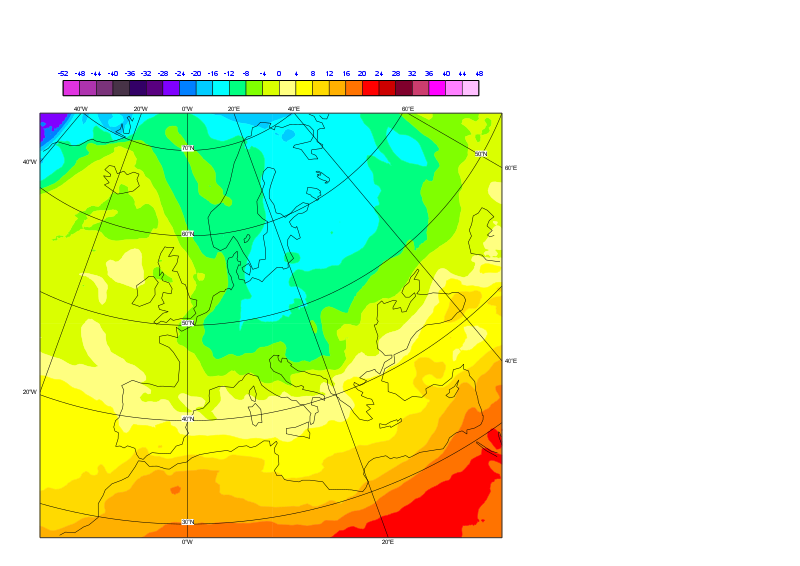

In [2]:
ecmwf_cont = magics.mcont(
    contour_automatic_setting = "ecmwf",
    legend = "on")

magics.plot(projection, precipitation, ecmwf_cont, coast, legend)
magics.plot(projection, geopotential, ecmwf_cont, coast, legend)
magics.plot(projection, temperature, ecmwf_cont, coast, legend)

### More ECCHARTS styles

Some of the parameters have more than one defined style on **ecCharts**.  

At the moment you can browse predefined **ecCharts** styles only using **Metview's WMS icon**, or by checking ecCharts get Capabilities, but in next **Magics** version there will be a function **wmsstyles()** that will show you styles' names for those parameters that have more than one style.

Let's pick one style. We need to set **contour_automatic_setting** to "style_name", and **contour_style_name** to desired style.

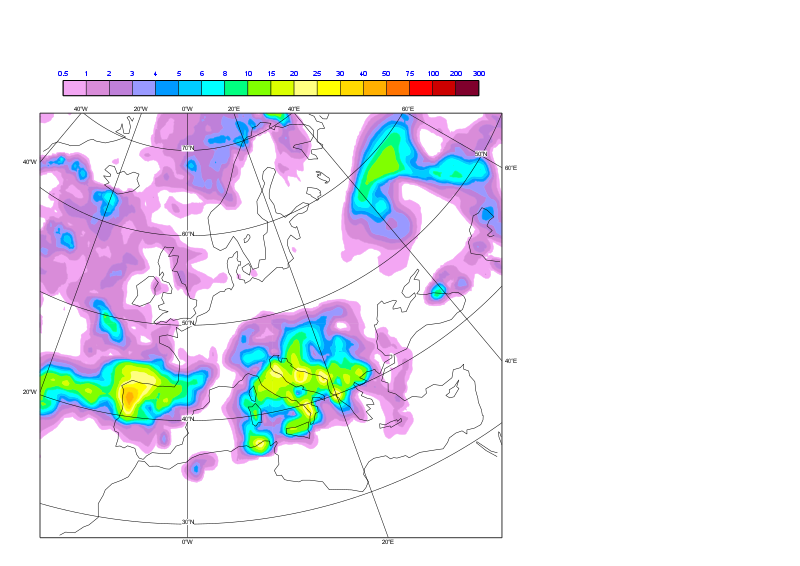

In [3]:
contour = magics.mcont(
    contour_automatic_setting = "style_name",
    contour_style_name        = "sh_all_f05t300lst",
    legend                    = 'on') 
    
magics.plot(projection, precipitation, contour, coast, legend)

### Predefined palettes

Magics offers number of predefined palettes, for a bit more flexibility.

It would be ideal if our number of levels matched number of colours in palette.  
If for any reason that is not the case, we can set parameter **contour_shade_palette_policy** to **'lastone'** or **'cycle'**, so Magics knows what to do if there are more levels than colours.   
Full list of Magics palletes can be found [here](https://confluence.ecmwf.int/display/MAGP/Predefined+palettes+in+Magics "Magics palettes")

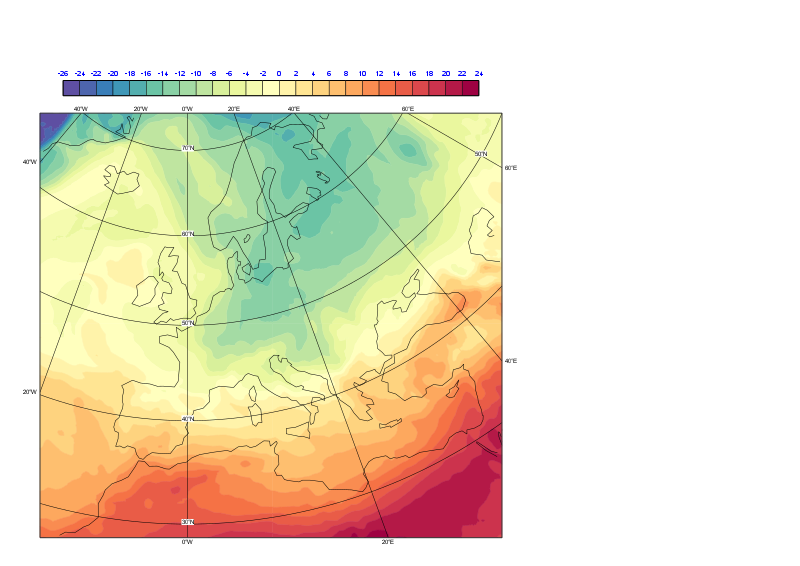

In [4]:
contour = magics.mcont(
    legend                       = 'on',
    contour                      = 'off',
    contour_shade                = 'on',
    contour_label                = 'off',
    contour_level_selection_type = 'interval',
    contour_interval             = 2.0,
    contour_shade_min_level      = -26.0,
    contour_shade_max_level      = 24.0,
    contour_shade_method         = 'area_fill',
    contour_shade_palette_name   = 'eccharts_rainbow_purple_red_25',
    contour_shade_colour_method  = 'palette'
)

magics.plot(projection, temperature, contour, coast, legend)